In [1]:
import glob, json, sys
import numpy as np
import os
import corner
import matplotlib.pyplot as plt

In [2]:
from enterprise_extensions.models import model_singlepsr_noise
from enterprise_extensions import model_utils
from la_forge import core, diagnostics
from h5pulsar.pulsar import FilePulsar

In [8]:
def read_post_pt(folder_path,param_name,burn_in=0):

   results = {}
   delimiter=' '
   chain_list = []
   for filename in os.listdir(folder_path):
     if filename.startswith("chain_"):
        chain_list.append(filename)
       #print(chain_list)
   chain_list = [name.replace('chain_','') for name in chain_list]
   chain_list = [name.replace('.txt','') for name in chain_list]
   chain_list = sorted(chain_list,key=float)
   chain_list = [str('chain_')+name for name in chain_list]
   chain_list = [name+str('.txt') for name in chain_list]
   print('Calibrating using chains from file',chain_list[0])
   data = []
   filename = chain_list[0]
   full_path = os.path.join(folder_path, filename)
   temp = np.genfromtxt(full_path,dtype=float,unpack=True)
   ndim = len(temp)-4
   print('Number of dimensions :',ndim)
   for i in range(ndim):
    post = temp[i,burn_in:]
    data.append(post)
    results[param_name[i]] = post
   print('Posterior samples imported')
   return results

In [4]:
datadir = './15yr_stochastic_analysis/tutorials/data'
psrs = []
for hdf5_file in glob.glob(datadir + '/hdf5/*.hdf5'):
    psrs.append(FilePulsar(hdf5_file))
print('Loaded {0} pulsars from hdf5 files'.format(len(psrs)))


Loaded 67 pulsars from hdf5 files


In [20]:
#12,33,36,65
psr = psrs[65]
for i in range(67):
 tt = psrs[i]
 #print(i,':',tt.name)
print('psr',psr.name)

psr J1600-3053


In [18]:
pta = model_singlepsr_noise(psr, tm_var=False, tm_linear=False,
                          tmparam_list=None,
                          red_var=True, psd='powerlaw', red_select=None,
                          noisedict=None, tm_svd=True, tm_norm=True,
                          white_vary=True, components=14, upper_limit=False,
                          is_wideband=False, use_dmdata=False, tnequad=False,
                          dmjump_var=False, gamma_val=None, dm_var=True,
                          dm_type='gp', dmgp_kernel='diag', dm_psd='powerlaw',
                          dm_nondiag_kernel='periodic', dmx_data=None,
                          dm_annual=False, gamma_dm_val=None,
                          dm_dt=15, dm_df=200,
                          chrom_gp=False, chrom_gp_kernel='nondiag',
                          chrom_psd='powerlaw', chrom_idx=4, chrom_quad=False,
                          chrom_kernel='periodic',
                          chrom_dt=15, chrom_df=200,
                          dm_expdip=False, dmexp_sign='negative',
                          dm_expdip_idx=2,
                          dm_expdip_tmin=None, dm_expdip_tmax=None,
                          num_dmdips=1, dmdip_seqname=None,
                          dm_cusp=False, dm_cusp_sign='negative',
                          dm_cusp_idx=2, dm_cusp_sym=False,
                          dm_cusp_tmin=None, dm_cusp_tmax=None,
                          num_dm_cusps=1, dm_cusp_seqname=None,
                          dm_dual_cusp=False, dm_dual_cusp_tmin=None,
                          dm_dual_cusp_tmax=None, dm_dual_cusp_sym=False,
                          dm_dual_cusp_idx1=2, dm_dual_cusp_idx2=4,
                          dm_dual_cusp_sign='negative', num_dm_dual_cusps=1,
                          dm_dual_cusp_seqname=None,
                          dm_sw_deter=False, dm_sw_gp=False,
                          swgp_prior=None, swgp_basis=None,
                          coefficients=False, extra_sigs=None,
                          psr_model=False, factorized_like=False,
                          Tspan=None, fact_like_gamma=13./3, gw_components=10,
                          fact_like_logmin=None, fact_like_logmax=None,
                          select='backend', tm_marg=True, dense_like=False, ng_twg_setup=False, wb_efac_sigma=0.25)
print('Done pta model')

Done pta model


In [19]:
outDir = './single_pulsar/posterior/'+psr.name+'_wn'
#outDir = './single_pulsar/'+psr.name+'_wn'

wn_param = pta.param_names[:-4]
wn = read_post_pt(outDir, wn_param,burn_in=20000)
print(len(wn[wn_param[-1]]))

outDir = './single_pulsar/posterior/'+psr.name+'_rn'
rn_param = pta.param_names
rn_param.pop(-3)
rn_param.pop(-3)
rn = read_post_pt(outDir, rn_param,burn_in=20000)
#print(rn)
#print(rn_param)
outDir1 = './single_pulsar/posterior/'+psr.name+'_rn_dmgp' 
rn_dmgp= read_post_pt(outDir1, pta.param_names,burn_in=20000)

dm_param = pta.param_names
dm_param.pop(-1)
dm_param.pop(-1)
#print(dm_param)
outDir2 = './single_pulsar/posterior/'+psr.name+'_dmgp' 
dmgp= read_post_pt(outDir2,dm_param,burn_in=20000)
para = pta.param_names[-2:]
para1 = pta.param_names[-4:]
para2 = pta.param_names[-4:-2]
print(para)
print(para1)
print(para2)

rn_wn = np.column_stack([rn[key] for key in wn_param])
rn_dmgp_wn = np.column_stack([rn_dmgp[key] for key in wn_param])
dmgp_wn = np.column_stack([dmgp[key] for key in wn_param])
wn_wn = np.column_stack([wn[key] for key in wn_param])

rn_post = np.column_stack([rn[key] for key in para])
rn_dmgp_post = np.column_stack([rn_dmgp[key] for key in para1])
dmgp_post = np.column_stack([dmgp[key] for key in para2])
#print(rn_post)


Calibrating using chains from file chain_1.txt
Number of dimensions : 30
Posterior samples imported
44600
Calibrating using chains from file chain_1.txt
Number of dimensions : 32
Posterior samples imported
Calibrating using chains from file chain_1.txt
Number of dimensions : 34
Posterior samples imported
Calibrating using chains from file chain_1.txt
Number of dimensions : 32
Posterior samples imported
['J1713+0747_red_noise_gamma', 'J1713+0747_red_noise_log10_A']
['J1713+0747_dm_gp_gamma', 'J1713+0747_dm_gp_log10_A', 'J1713+0747_red_noise_gamma', 'J1713+0747_red_noise_log10_A']
['J1713+0747_dm_gp_gamma', 'J1713+0747_dm_gp_log10_A']


['J1705-1903_Rcvr1_2_GUPPI_efac', 'J1705-1903_Rcvr1_2_GUPPI_log10_ecorr', 'J1705-1903_Rcvr1_2_GUPPI_log10_t2equad', 'J1705-1903_Rcvr_800_GUPPI_efac', 'J1705-1903_Rcvr_800_GUPPI_log10_ecorr']


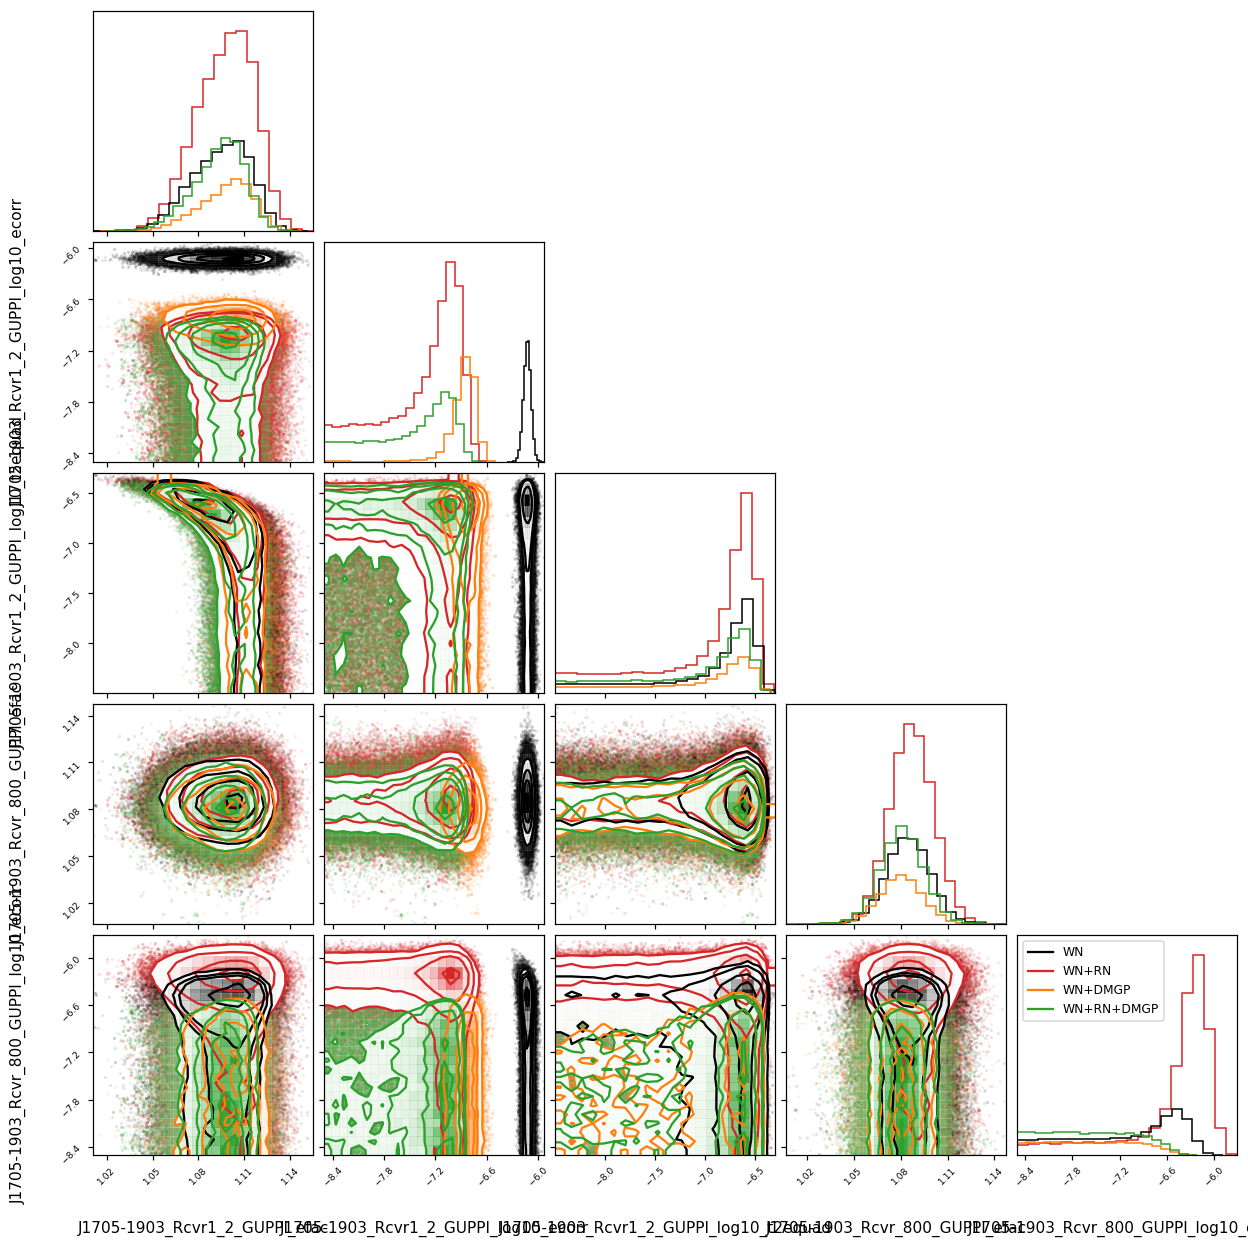

In [15]:
i =5
lab1 = wn_param[0:i]
print(lab1)
fig = corner.corner(rn_wn[:,0:i], bins=20, color='C3',
labels=wn_param)
corner.corner(wn_wn[:,0:i], bins=20, color='black',labels=wn_param,fig=fig)
corner.corner(dmgp_wn[:,0:i], bins=20, color='C1',labels=wn_param,fig=fig)

corner.corner(rn_dmgp_wn[:,0:i], bins=20, color='C2',labels=wn_param,fig=fig)

plt.plot([], [], color='black', label='WN')
plt.plot([], [], color='C3', label='WN+RN')
plt.plot([], [], color='C1', label='WN+DMGP')

plt.plot([], [], color='C2', label='WN+RN+DMGP')

#corner.corner(j1909_rn_crn2_post, bins=30, color='C3', fig=fig)
plt.legend(loc='upper left', fontsize=8)
plt.rcParams.update({'xtick.labelsize': 6, 'ytick.labelsize': 6})
plt.show()

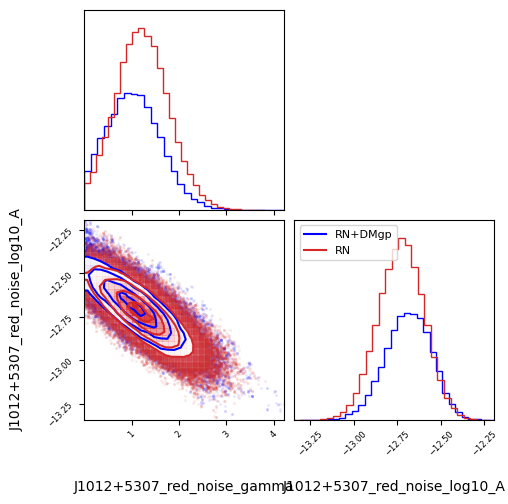

In [13]:
lab1 = para

fig2 = corner.corner(rn_dmgp_post[:,-2:], bins=30, color='blue',labels=lab1)
corner.corner(rn_post[:,-2:], bins=30, color='C3',labels=lab1,fig=fig2)
plt.plot([], [], color='blue', label='RN+DMgp')
plt.plot([], [], color='C3', label='RN')
plt.legend(loc='upper left', fontsize=8)
plt.show()

['J1600-3053_dm_gp_gamma', 'J1600-3053_dm_gp_log10_A']
['J1600-3053_dm_gp_gamma', 'J1600-3053_dm_gp_log10_A']


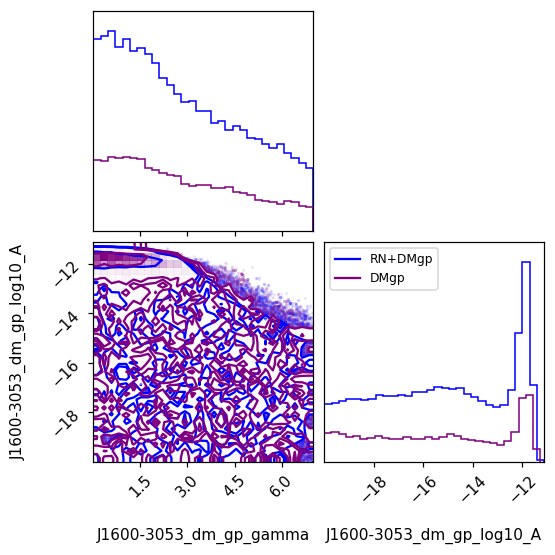

In [35]:
lab1 = pta.param_names[-4:-2]
print(lab1)
print(lab1)

fig2 = corner.corner(rn_dmgp_post[:,-4:-2], bins=30, color='blue',labels=lab1)
corner.corner(dmgp_post[:,-2:], bins=30, color='purple',labels=lab1,fig=fig2)
plt.plot([], [], color='blue', label='RN+DMgp')
plt.plot([], [], color='purple', label='DMgp')
plt.legend(loc='upper left', fontsize=8)
plt.show()

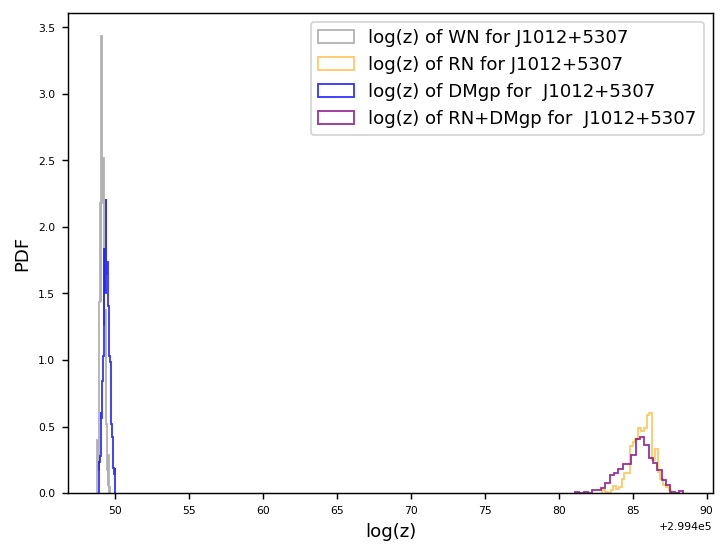

log_z RN 4000 realisation: 299485.6818697665
log_BF from 4000 realisation: 36.25470148412716
2*log10_BF from 4000 realisation: 31.49043359521212
error on BF from 4000 realisation: 0.7918522929463687


27.88430547615789

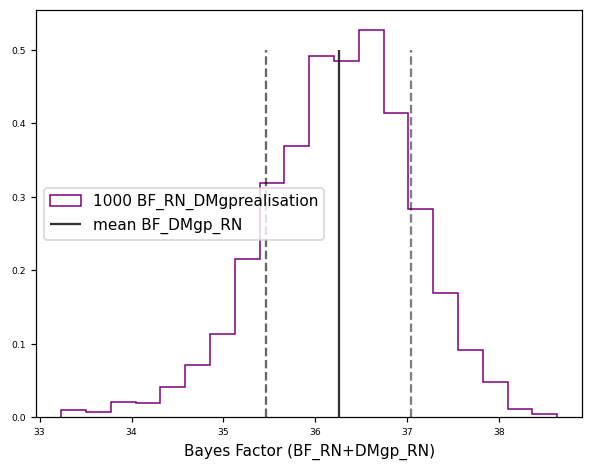

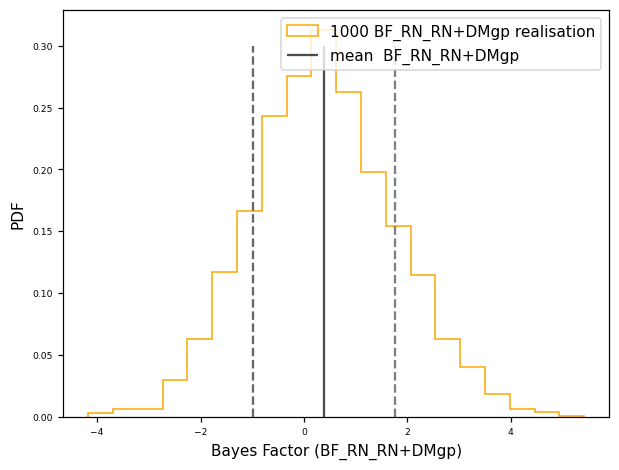

In [11]:
plt.rcParams['figure.dpi'] = 130
nbin = 25
J1012_5307_wn = np.genfromtxt('./single_pulsar/gss/J1012+5307_wn_log_z_40kpost_500_32T_500_1000s.txt',dtype=float,unpack=True)
J1012_5307_rn = np.genfromtxt('./single_pulsar/gss/J1012+5307_rn_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1012_5307_dmgp = np.genfromtxt('./single_pulsar/gss/J1012+5307_dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1012_5307_rn_dmgp = np.genfromtxt('./single_pulsar/gss/J1012+5307_rn+dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)

plt.hist(J1012_5307_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN for J1012+5307')
plt.hist(J1012_5307_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN for J1012+5307')
plt.hist(J1012_5307_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp for  J1012+5307')
plt.hist(J1012_5307_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for  J1012+5307')


#plt.vlines(np.mean(J1012_5307_rn), ymin=0, ymax=0.9,linestyle='dashed',alpha=0.5,color='orange',label='mean log(z) RN ')
#plt.vlines(np.mean(J1012_5307_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='blue',alpha=0.5,label='mean log(z) DMgp ')
#plt.vlines(np.mean(J1012_5307_rn_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='purple',alpha=0.5,label='mean log(z) RN+DMgp ')
plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
plt.rcParams['figure.dpi'] = 110
N = 4000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    rn_z = np.random.choice(J1012_5307_rn)
    rndm_z = np.random.choice(J1012_5307_dmgp)
    BF[i] =  rn_z-rndm_z 
ymax=0.5
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='1000 BF_RN_DMgprealisation')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean BF_DMgp_RN ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_RN)')
plt.figure()
for i in range(N):
    rn_z = np.random.choice(J1012_5307_rn)
    rndm_z = np.random.choice(J1012_5307_rn_dmgp)
    BF_dm[i] =  rn_z - rndm_z
ymax=0.3
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='1000 BF_RN_RN+DMgp realisation')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean  BF_RN_RN+DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
plt.ylabel('PDF')
print('log_z RN',N,'realisation:',np.mean(J1012_5307_rn))

print('log_BF from',N,'realisation:',np.mean(BF))
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))
print('error on BF from',N,'realisation:',np.std(BF))
np.log(10**12.11) #nano IRN vs CURN



BF inc  72.50390702738622
std BF inc  1.3598056610548983


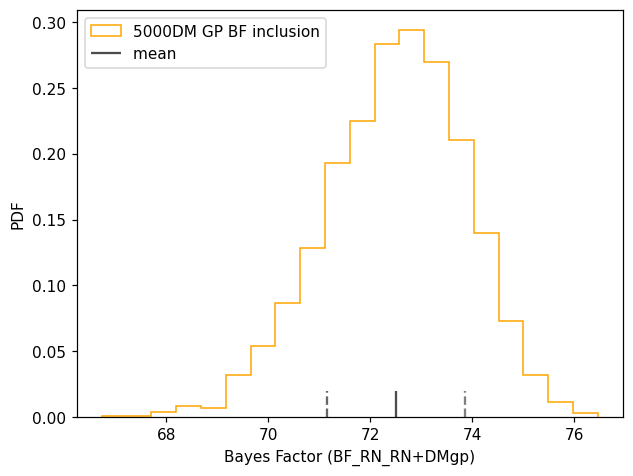

In [21]:
## BF inclusion DMGP
J1012_5307_wn
J1012_5307_rn
J1012_5307_dmgp
J1012_5307_rn_dmgp
N = 5000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1012_5307_wn)
    rn_z = np.random.choice(J1012_5307_rn)
    dm_z = np.random.choice(J1012_5307_dmgp)
    rndm_z = np.random.choice(J1012_5307_rn_dmgp)

    BF_inc[i] =  (rn_z + rndm_z)-( wn_z + dm_z)
    #BF_inc = (J1012_5307_rn+J1012_5307_rn_dmgp)-(J1012_5307_wn+J1012_5307_dmgp)

plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
plt.ylabel('PDF')

print('BF inc ', np.mean(BF_inc))
print('std BF inc ', np.std(BF_inc))


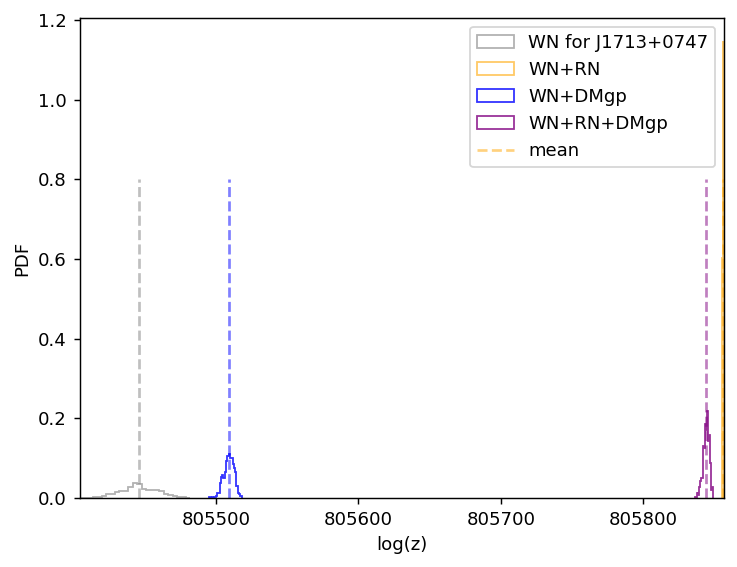

log_BF from 4000 realisation: 410.9608694298993
2*log10_BF from 4000 realisation: 356.95607574313607
error on BF from 4000 realisation: 13.150970675762807


27.88430547615789

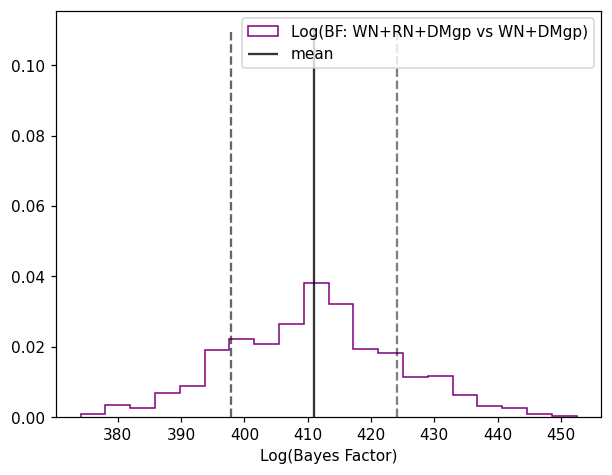

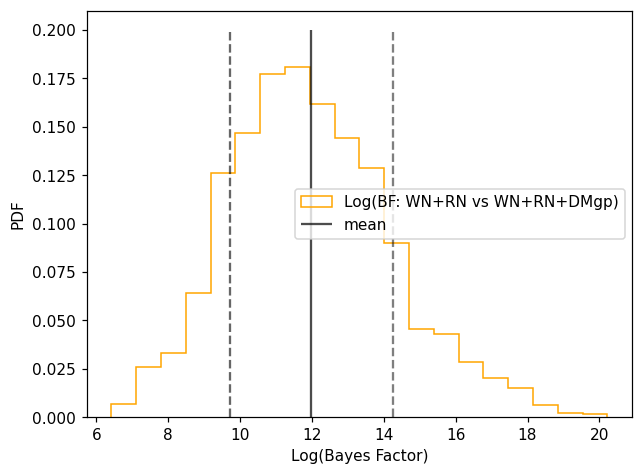

In [4]:
plt.rcParams['figure.dpi'] = 130
nbin = 25

J1713_0747_wn = np.genfromtxt('./single_pulsar/gss/J1713+0747_wn_log_z_40kpost_500_32T_500_1000s.txt',dtype=float,unpack=True)

J1713_0747_rn = np.genfromtxt('./single_pulsar/gss/J1713+0747_rn_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1713_0747_dmgp = np.genfromtxt('./single_pulsar/gss/J1713+0747_dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1713_0747_rn_dmgp = np.genfromtxt('./single_pulsar/gss/J1713+0747_rn+dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)

plt.hist(J1713_0747_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='WN for J1713+0747')
plt.hist(J1713_0747_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='WN+RN')
plt.hist(J1713_0747_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='WN+DMgp')
plt.hist(J1713_0747_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='WN+RN+DMgp')

ymax=0.8
plt.vlines(np.mean(J1713_0747_wn), ymin=0, ymax=ymax,linestyle='dashed',alpha=0.5,color='grey')
plt.vlines(np.mean(J1713_0747_rn), ymin=0, ymax=ymax,linestyle='dashed',alpha=0.5,color='orange',label='mean')
plt.vlines(np.mean(J1713_0747_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='blue',alpha=0.5)#,label='mean log(z) DMgp ')
plt.vlines(np.mean(J1713_0747_rn_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='purple',alpha=0.5)#,label='mean log(z) RN+DMgp ')
plt.xlabel('log(z)')
plt.xlim(min(J1713_0747_wn),max(J1713_0747_rn))
plt.ylabel('PDF')
plt.legend()
plt.show()
plt.rcParams['figure.dpi'] = 110
N = 4000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    rn_z = np.random.choice(J1713_0747_rn)
    wn = np.random.choice(J1713_0747_wn)
    BF[i] =  rn_z-wn
ymax=0.11
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='Log(BF: WN+RN+DMgp vs WN+DMgp)')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Log(Bayes Factor)')
plt.figure()
for i in range(N):
    rn_z = np.random.choice(J1713_0747_rn)
    rndm_z = np.random.choice(J1713_0747_rn_dmgp)
    BF_dm[i] =  rn_z - rndm_z
ymax=0.2
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='Log(BF: WN+RN vs WN+RN+DMgp)')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Log(Bayes Factor)')
plt.ylabel('PDF')
print('log_BF from',N,'realisation:',np.mean(BF))
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))
print('error on BF from',N,'realisation:',np.std(BF))
np.log(10**12.11) #nano IRN vs CURN


BF inc  745.8327439888329
std BF inc  13.742445427260707


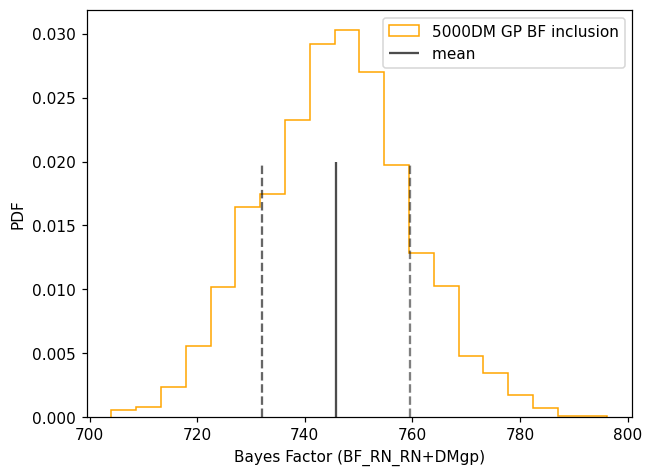

In [24]:
J1713_0747_wn
J1713_0747_rn
J1713_0747_dmgp
J1713_0747_rn_dmgp
N = 5000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1713_0747_wn)
    rn_z = np.random.choice(J1713_0747_rn)
    dm_z = np.random.choice(J1713_0747_dmgp)
    rndm_z = np.random.choice(J1713_0747_rn_dmgp)

    BF_inc[i] =  (rn_z + rndm_z)-( wn_z + dm_z)
    #BF_inc = (J1713_0747_rn+J1713_0747_rn_dmgp)-(J1713_0747_wn+J1713_0747_dmgp)
ymax =0.02
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
plt.ylabel('PDF')

print('BF inc ', np.mean(BF_inc))
print('std BF inc ', np.std(BF_inc))


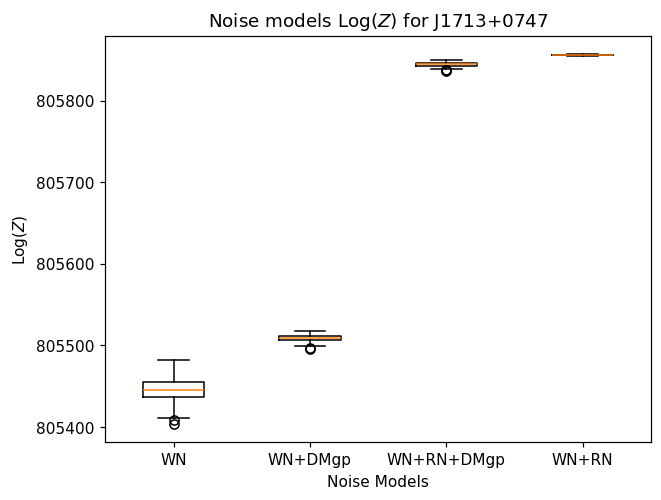

500

In [25]:
# Combine all vectors into a list
data = [J1713_0747_wn,J1713_0747_dmgp ,J1713_0747_rn_dmgp,J1713_0747_rn]

# Create a box plot
plt.boxplot(data)

# Set x-labels
plt.xticks([1, 2, 3, 4], ['WN', 'WN+DMgp','WN+RN+DMgp', 'WN+RN'])

# Set labels and title
plt.xlabel('Noise Models')
plt.ylabel('Log($Z$)')
plt.title('Noise models Log($Z$) for J1713+0747')

# Display the plot
plt.show()
len(J1713_0747_dmgp)

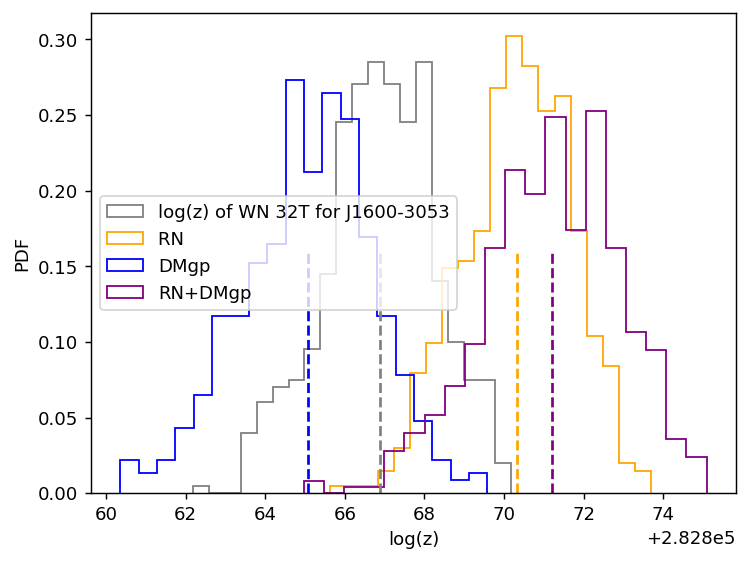

log_BF from 5000 realisation: 3.443478971189575
2*log10_BF from 5000 realisation: 2.990967831475038
error on BF from 5000 realisation: 1.9500811443313741


2.4901888030838126

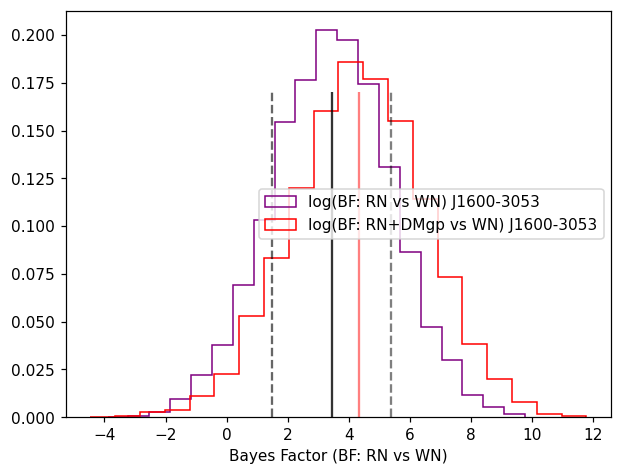

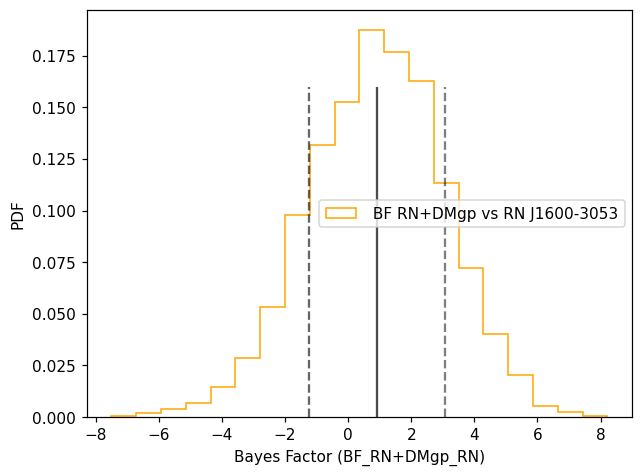

In [8]:
plt.rcParams['figure.dpi'] = 130
nbin = 20
J1600_3053_rn = np.genfromtxt('./single_pulsar/gss/J1600-3053_rn_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1600_3053_dmgp = np.genfromtxt('./single_pulsar/gss/J1600-3053_dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)
J1600_3053_rn_dmgp = np.genfromtxt('./single_pulsar/gss/J1600-3053_rn+dmgp_log_z_200kpost_500_16T_500_300s.txt',dtype=float,unpack=True)

J1600_3053_rn_32 = np.genfromtxt('./single_pulsar/gss/J1600-3053_rn_log_z_200kpost_500_32T_500_2000s.txt',dtype=float,unpack=True)
J1600_3053_dmgp_32 = np.genfromtxt('./single_pulsar/gss/J1600-3053_dmgp_log_z_200kpost_500_32T_500_2000s.txt',dtype=float,unpack=True)
J1600_3053_rn_dmgp_32 = np.genfromtxt('./single_pulsar/gss/J1600-3053_rn+dmgp_log_z_200kpost_500_32T_500_2000s.txt',dtype=float,unpack=True)

J1600_3053_wn_32 = np.genfromtxt('./single_pulsar/gss/J1600-3053_wn_log_z_40kpost_500_32T_500_1000s.txt',dtype=float,unpack=True)


plt.hist(J1600_3053_wn_32,alpha=1,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN 32T for J1600-3053')

#plt.hist(J1600_3053_rn,alpha=0.5,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN 16T for J1600-3053')
plt.hist(J1600_3053_rn_32,alpha=1,bins= nbin,density=True,histtype='step',color='orange',label='RN ')

#plt.hist(J1600_3053_dmgp ,alpha=0.5,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp  for  J1600-3053')
plt.hist(J1600_3053_dmgp_32 ,alpha=1,bins= nbin,histtype='step',density=True,color='blue',label='DMgp')

#plt.hist(J1600_3053_rn_dmgp ,alpha=0.5,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for J1600-3053')
plt.hist(J1600_3053_rn_dmgp_32 ,alpha=1,bins= nbin,histtype='step',density=True,color='purple',label='RN+DMgp')
ymax = 0.16

plt.vlines(np.mean(J1600_3053_wn_32), ymin=0, ymax=ymax,linestyle='dashed',alpha=1,color='grey')
plt.vlines(np.mean(J1600_3053_rn_32), ymin=0, ymax=ymax,linestyle='dashed',alpha=1,color='orange')
plt.vlines(np.mean(J1600_3053_dmgp_32), ymin=0, ymax=ymax,linestyle='dashed',color='blue',alpha=1)
plt.vlines(np.mean(J1600_3053_rn_dmgp_32), ymin=0, ymax=ymax,linestyle='dashed',color='purple',alpha=1)
plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
plt.rcParams['figure.dpi'] = 110
N = 5000
BF = np.zeros(N)
BF2 = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):
    rndm_z = np.random.choice(J1600_3053_rn_dmgp_32)
    rn_z = np.random.choice(J1600_3053_rn_32)
    wn_z = np.random.choice(J1600_3053_wn_32)
    BF[i] =  rn_z-wn_z 
    BF2[i] = rndm_z - wn_z
ymax=0.17
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='log(BF: RN vs WN) J1600-3053')
plt.hist(BF2,bins= 20,alpha=1,density=True,histtype='step',color='red',label='log(BF: RN+DMgp vs WN) J1600-3053')
plt.vlines(np.mean(BF2), ymin=0, ymax=ymax,colors='red',alpha=0.5)#,label='mean (BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8)#,label='mean (BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF: RN vs WN)')
plt.figure()
for i in range(N):
    rn_z = np.random.choice(J1600_3053_rn_32)
    rndm_z = np.random.choice(J1600_3053_rn_dmgp_32)
    BF_dm[i] =  rndm_z - rn_z 
ymax=0.16
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=' BF RN+DMgp vs RN J1600-3053')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7)#,label='mean  BF_RN_RN+DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_RN)')
plt.ylabel('PDF')
print('log_BF from',N,'realisation:',np.mean(BF))
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))
print('error on BF from',N,'realisation:',np.std(BF))
np.exp(np.mean(BF_dm)) #nano IRN vs CURN


BF inc  -0.9360210743147181
std BF inc  3.0611246380458543


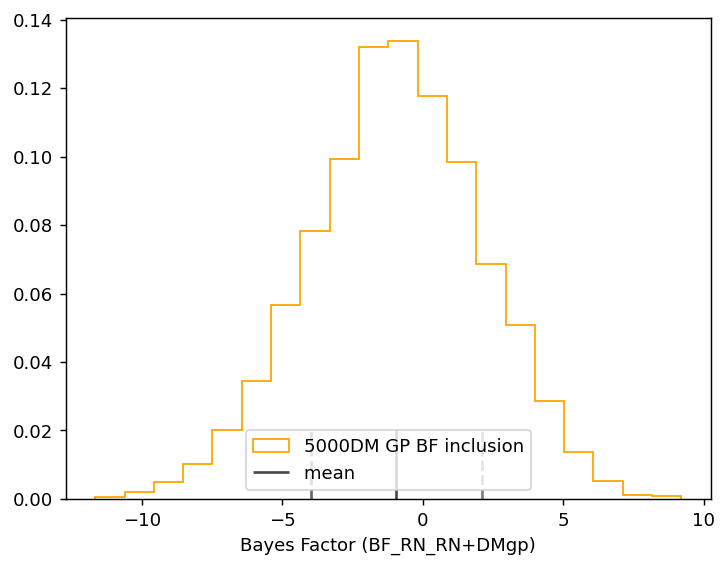

In [37]:
J1600_3053_wn_32
J1600_3053_rn_32
J1600_3053_dmgp_32
J1600_3053_rn_dmgp_32
N = 5000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1600_3053_wn_32)
    rn_z = np.random.choice(J1600_3053_rn_32)
    dm_z = np.random.choice(J1600_3053_dmgp_32)
    rndm_z = np.random.choice(J1600_3053_rn_dmgp_32)

    BF_inc[i] =  (dm_z + rndm_z)-( wn_z + rn_z)
    #BF_inc = (J1600_3053_rn+J1600_3053_rn_dmgp)-(J1600_3053_wn+J1600_3053_dmgp)
ymax =0.02
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
print('BF inc ', np.mean(BF_inc))
print('std BF inc ', np.std(BF_inc))

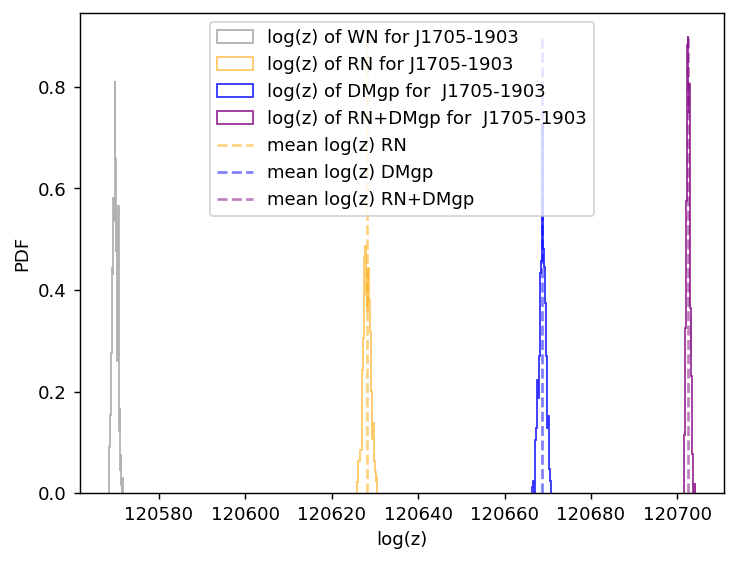

log_BF from 4000 realisation: 132.61265076289402
2*log10_BF from 4000 realisation: 115.18588491377587
error on BF from 4000 realisation: 0.741352481665424


27.88430547615789

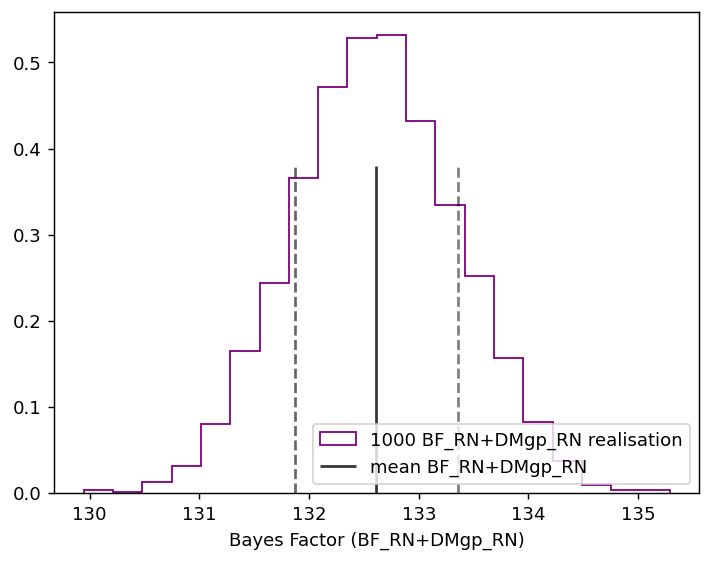

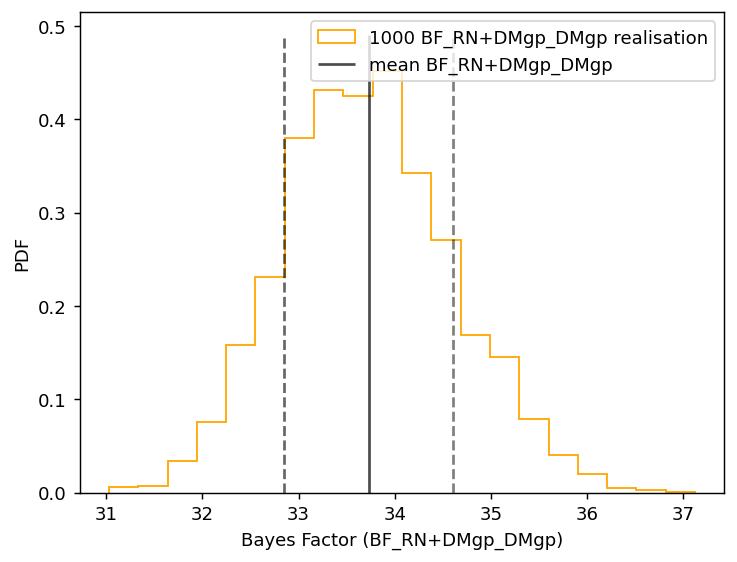

In [6]:
plt.rcParams['figure.dpi'] = 130
nbin = 25
J1705_1903_wn = np.genfromtxt('./single_pulsar/gss/J1705-1903_wn_log_z_40kpost_500_32T_500_1000s.txt',dtype=float,unpack=True)
J1705_1903_rn = np.genfromtxt('./single_pulsar/gss/J1705-1903_rn2_log_z_40kpost_500_32T_500_1000s.txt',dtype=float,unpack=True)

#J1705_1903_rn = np.genfromtxt('./single_pulsar/gss/J1705-1903_rn_log_z_200kpost_500_16T_500_100s.txt',dtype=float,unpack=True)
J1705_1903_dmgp = np.genfromtxt('./single_pulsar/gss/J1705-1903_dmgp_log_z_200kpost_500_16T_500_100s.txt',dtype=float,unpack=True)
J1705_1903_rn_dmgp = np.genfromtxt('./single_pulsar/gss/J1705-1903_rn+dmgp_log_z_200kpost_500_16T_500_100s.txt',dtype=float,unpack=True)

plt.hist(J1705_1903_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN for J1705-1903')
plt.hist(J1705_1903_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN for J1705-1903')
plt.hist(J1705_1903_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp for  J1705-1903')
plt.hist(J1705_1903_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for  J1705-1903')


plt.vlines(np.mean(J1705_1903_rn), ymin=0, ymax=0.9,linestyle='dashed',alpha=0.5,color='orange',label='mean log(z) RN ')
plt.vlines(np.mean(J1705_1903_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='blue',alpha=0.5,label='mean log(z) DMgp ')
plt.vlines(np.mean(J1705_1903_rn_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='purple',alpha=0.5,label='mean log(z) RN+DMgp ')
plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
plt.rcParams['figure.dpi'] = 130
N = 4000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    wn_z = np.random.choice(J1705_1903_wn)
    rndm_z = np.random.choice(J1705_1903_rn_dmgp)
    BF[i] = rndm_z - wn_z
for i in range(N):
    dmgp_z = np.random.choice(J1705_1903_dmgp)
    rndm_z = np.random.choice(J1705_1903_rn_dmgp)
    BF_dm[i] = rndm_z - dmgp_z
ymax=0.38
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='1000 BF_RN+DMgp_RN realisation')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean BF_RN+DMgp_RN ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_RN)')
plt.figure()
ymax=0.49
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='1000 BF_RN+DMgp_DMgp realisation')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_DMgp)')
plt.ylabel('PDF')
print('log_BF from',N,'realisation:',np.mean(BF))
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))
print('error on BF from',N,'realisation:',np.std(BF))
np.log(10**12.11) #nano IRN vs CURN

BF inc  173.21230196576886
std BF inc  1.3508226816892284


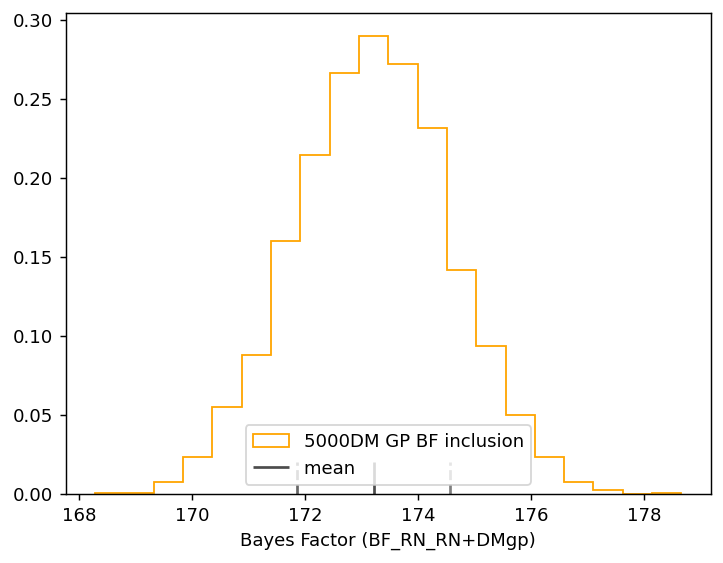

In [31]:
N = 5000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1705_1903_wn)
    rn_z = np.random.choice(J1705_1903_rn)
    dm_z = np.random.choice(J1705_1903_dmgp)
    rndm_z = np.random.choice(J1705_1903_rn_dmgp)

    BF_inc[i] =  (dm_z + rndm_z)-( wn_z + rn_z)
    #BF_inc = (J1705_1903_rn+J1705_1903_rn_dmgp)-(J1705_1903_wn+J1705_1903_dmgp)
ymax =0.02
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
print('BF inc ', np.mean(BF_inc))
print('std BF inc ', np.std(BF_inc))